In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from google.colab import drive
from statsmodels.graphics.tsaplots import plot_acf
import math

In [2]:
#### IMPORTANT THINGS TO WE FIND
#### The skewness being all over the place month-wise is very intereting to see. Wonder why?
#### Should really be including some factors to account for structural breaks in the date. ****
#### As expected most firms are dying pretty quickly, which is why is important to avoid the surviorship bias in our data
#### Skewed - Realized Vol, MaxRet, IdioVol3F, High52, Firm Age, Beta(positive skew), lnP, TK
#### Extremevals - EP, Realizedvol, MOM6m, MOM12, MaxRet, IdioVol3F, Beta
#### Talking about correlation with Ret -- Realized Vol, IdioVol3F, FirmAge, and TK seem significant
#### Only TK and Return skew seems to have a visible relation with returns.
#### Also keep in mind these are last-months returns so there is a need of another \\
#### exploration with the future returns (hence the shape of high52 and maxRet)
#### Another thing that pops up is the FirmAge vs Ret distribution. Worth looking into!

In [3]:
# Set seaborn dark theme
sns.set_theme(style="darkgrid")
d_bg = sns.axes_style()["axes.facecolor"]
# Use a lighter color palette
colors = sns.color_palette("pastel")
plt.rcParams['figure.facecolor'] = '#3b3b3b'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

In [4]:
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Quantitative Investment Portfolio/Data/'

Mounted at /content/drive


In [ ]:
# Imputation doesn't affect the factor distributions that much but for this notebook we use the datasets which include missing values.

In [5]:
data = pd.read_parquet(data_dir + 'standardized_factors.parquet')

In [6]:
data.columns

Index(['permno', 'yyyymm', 'hsiccd', 'ind', 's', 'zret', 'zlnP', 'zlnsize',
       'zAbnormalAccruals', 'zAccruals', 'zAssetGrowth', 'zBeta', 'zbetaVIX',
       'zBMdec', 'zBookLeverage', 'zCF', 'zChAssetTurnover', 'zChNAnalyst',
       'zCPVolSpread', 'zEarningsStreak', 'zEP', 'zFEPS', 'zfgr5yrLag', 'zGP',
       'zgrcapx', 'zGrLTNOA', 'zHigh52', 'zhire', 'zIdioVol3F', 'zIntMom',
       'zInvestment', 'zMom6m', 'zMomOffSeason', 'zMomSeason', 'zNetDebtPrice',
       'zOperProfRD', 'zOScore', 'zRD', 'zReturnSkew3F', 'zREV6',
       'zRIVolSpread', 'zShareIss1Y', 'zSmileSlope', 'zSurpriseRD',
       'zDebtIssuance', 'zTK', 'zmarket_age', 'year', 'month'],
      dtype='object')

In [19]:
cols = data.columns[6:-2]

In [20]:
cols

Index(['zlnP', 'zlnsize', 'zAbnormalAccruals', 'zAccruals', 'zAssetGrowth',
       'zBeta', 'zbetaVIX', 'zBMdec', 'zBookLeverage', 'zCF',
       'zChAssetTurnover', 'zChNAnalyst', 'zCPVolSpread', 'zEarningsStreak',
       'zEP', 'zFEPS', 'zfgr5yrLag', 'zGP', 'zgrcapx', 'zGrLTNOA', 'zHigh52',
       'zhire', 'zIdioVol3F', 'zIntMom', 'zInvestment', 'zMom6m',
       'zMomOffSeason', 'zMomSeason', 'zNetDebtPrice', 'zOperProfRD',
       'zOScore', 'zRD', 'zReturnSkew3F', 'zREV6', 'zRIVolSpread',
       'zShareIss1Y', 'zSmileSlope', 'zSurpriseRD', 'zDebtIssuance', 'zTK',
       'zmarket_age'],
      dtype='object')

In [16]:
data.zret.corr(data['zret'])

1.0

Perc of non-zero data: 71.1%
Perc of missing data: 0.0%
Correlation with returns: 8.6%


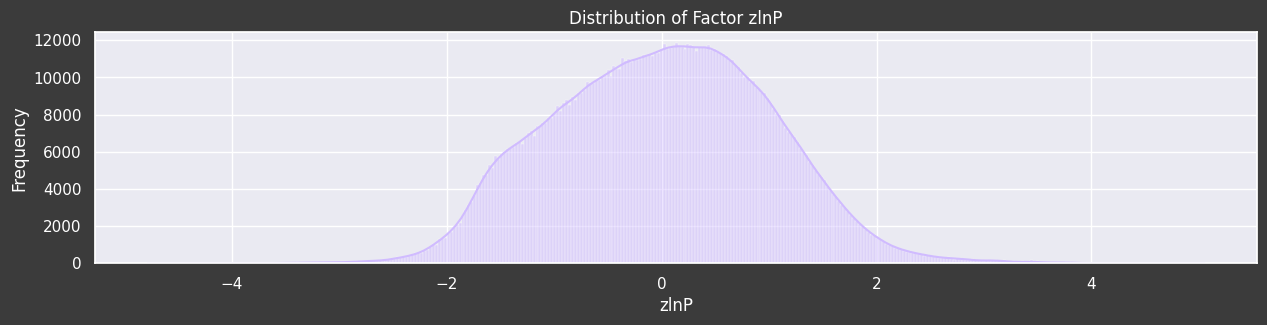

Perc of non-zero data: 71.1%
Perc of missing data: 0.0%
Correlation with returns: 3.1%


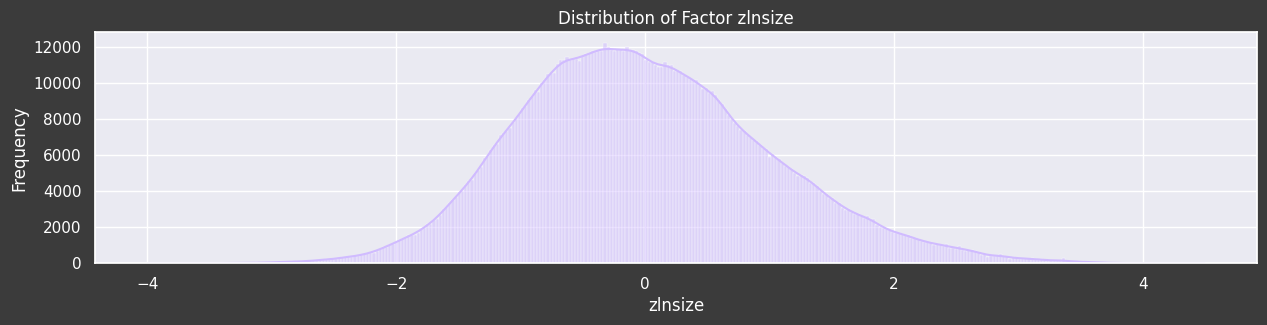

Perc of non-zero data: 48.9%
Perc of missing data: 29.6%
Correlation with returns: 1.0%


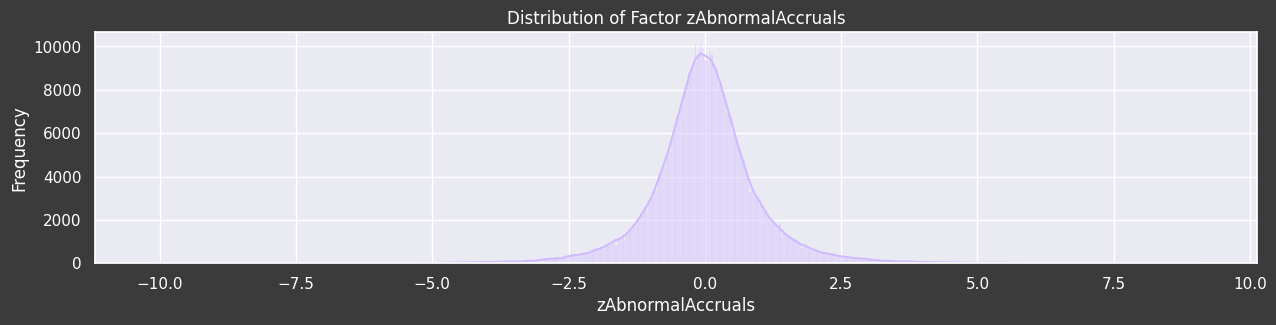

Perc of non-zero data: 56.8%
Perc of missing data: 18.7%
Correlation with returns: 1.0%


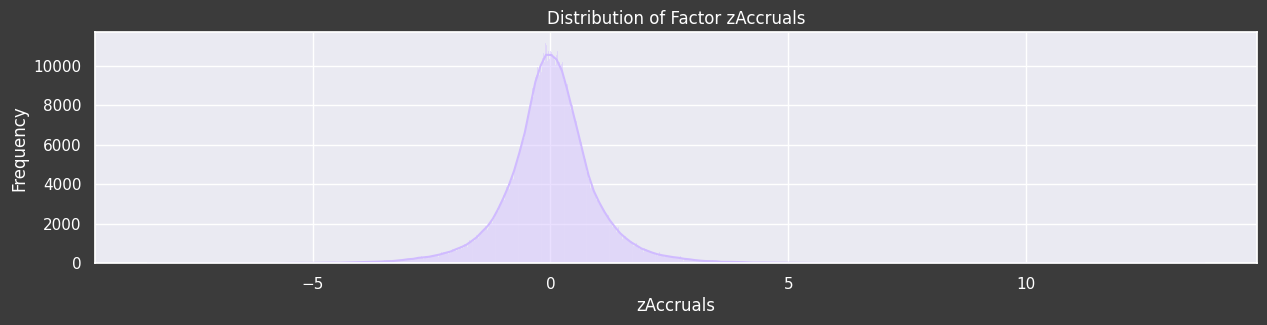

Perc of non-zero data: 57.0%
Perc of missing data: 18.4%
Correlation with returns: 1.7%


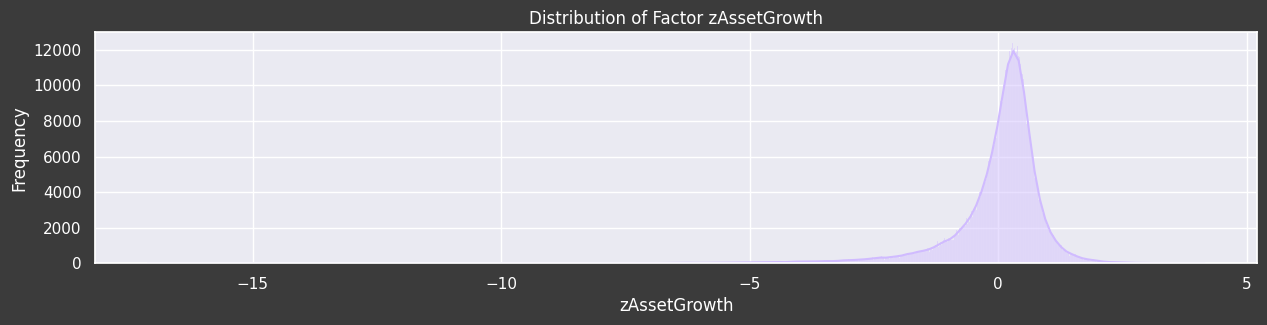

Perc of non-zero data: 61.9%
Perc of missing data: 11.4%
Correlation with returns: 2.4%


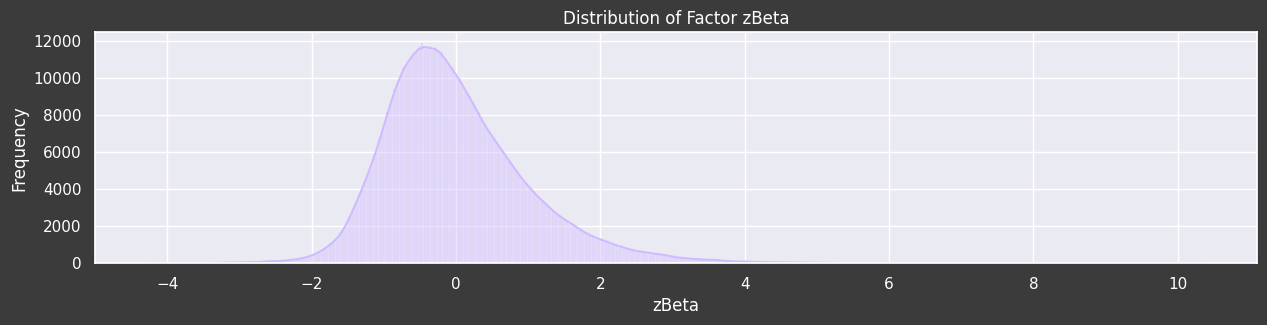

Perc of non-zero data: 71.1%
Perc of missing data: 0.0%
Correlation with returns: -0.3%


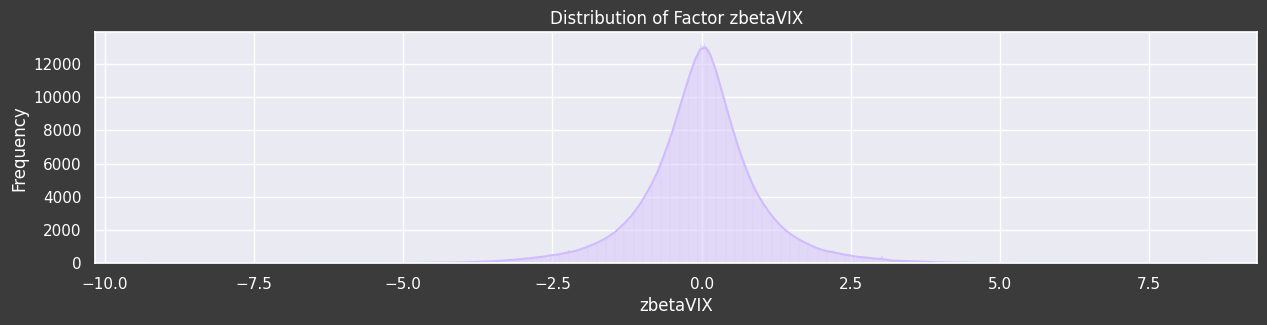

Perc of non-zero data: 56.7%
Perc of missing data: 18.8%
Correlation with returns: 0.4%


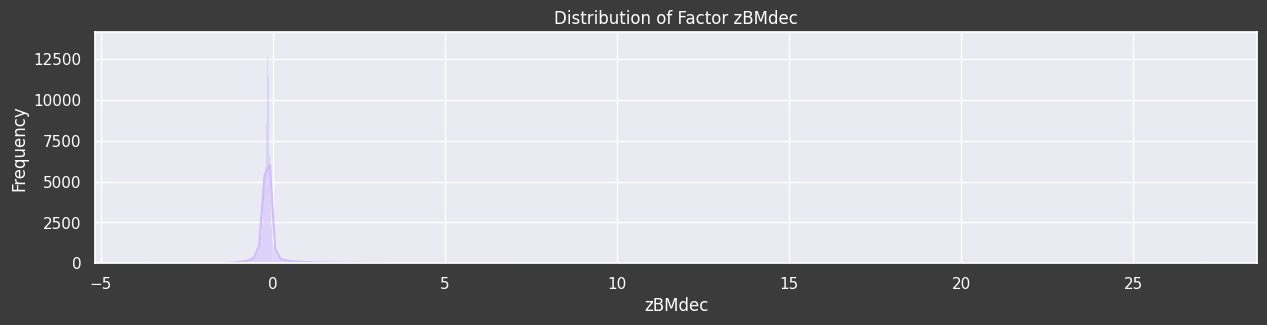

Perc of non-zero data: 62.6%
Perc of missing data: 11.7%
Correlation with returns: -0.5%


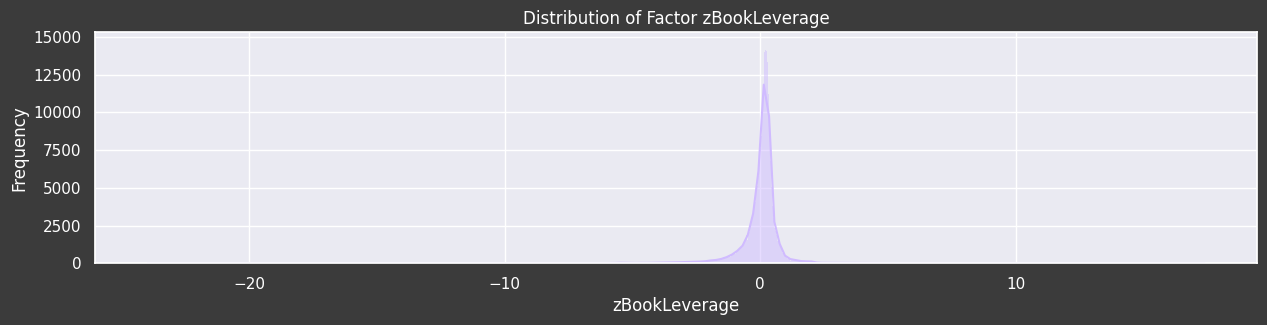

Perc of non-zero data: 57.6%
Perc of missing data: 19.0%
Correlation with returns: -6.4%


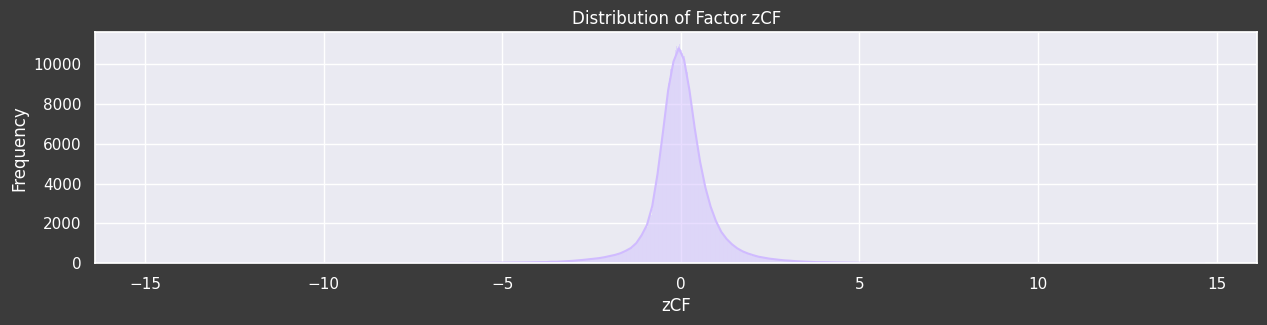

Perc of non-zero data: 43.9%
Perc of missing data: 36.3%
Correlation with returns: 0.2%


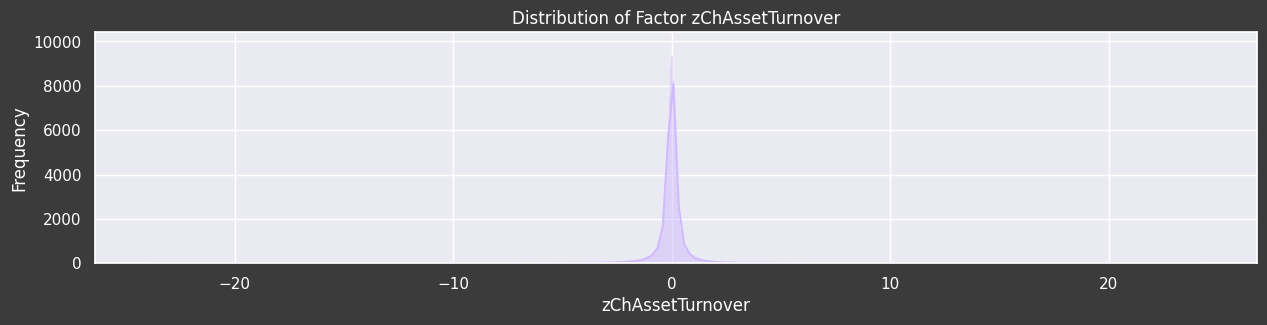

Perc of non-zero data: 2.4%
Perc of missing data: 96.4%
Correlation with returns: 2.1%


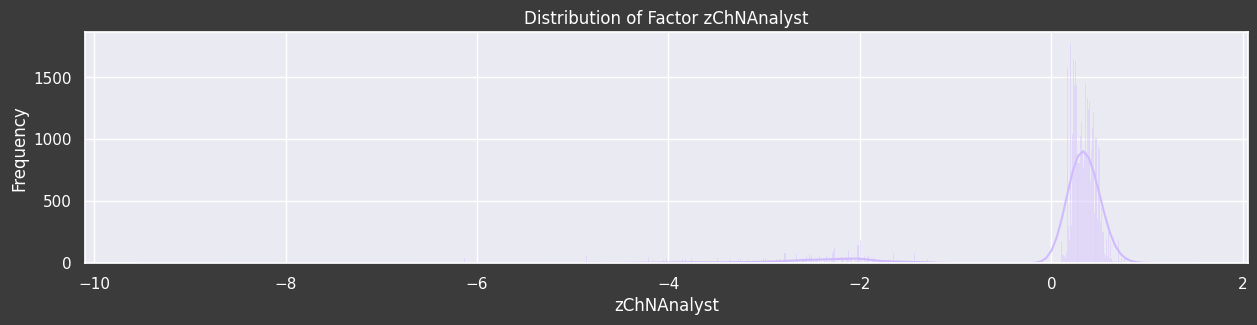

Perc of non-zero data: 22.4%
Perc of missing data: 66.4%
Correlation with returns: -4.7%


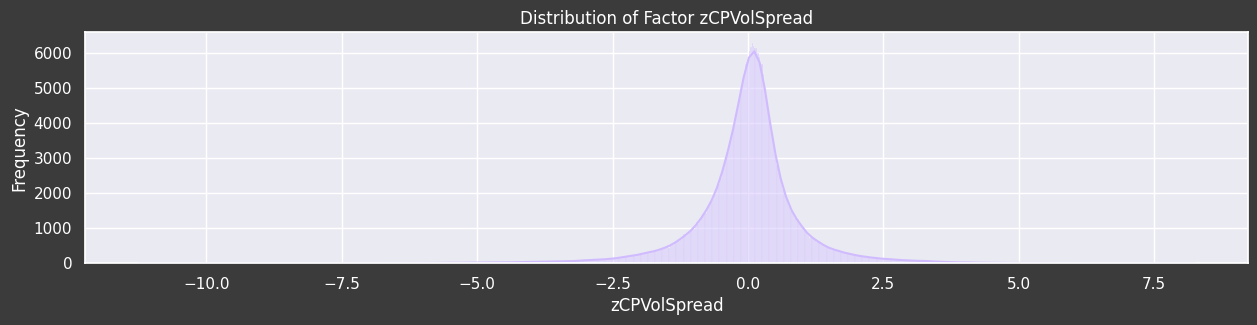

Perc of non-zero data: 35.9%
Perc of missing data: 48.0%
Correlation with returns: 2.7%


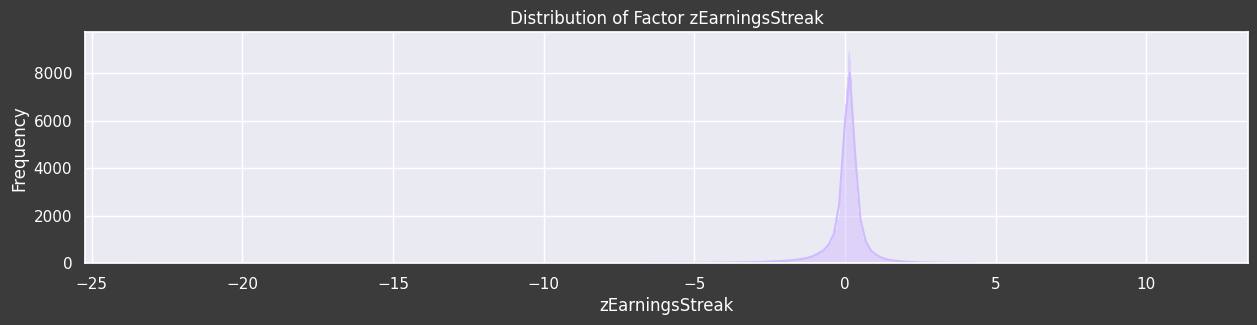

Perc of non-zero data: 46.1%
Perc of missing data: 35.1%
Correlation with returns: 1.4%


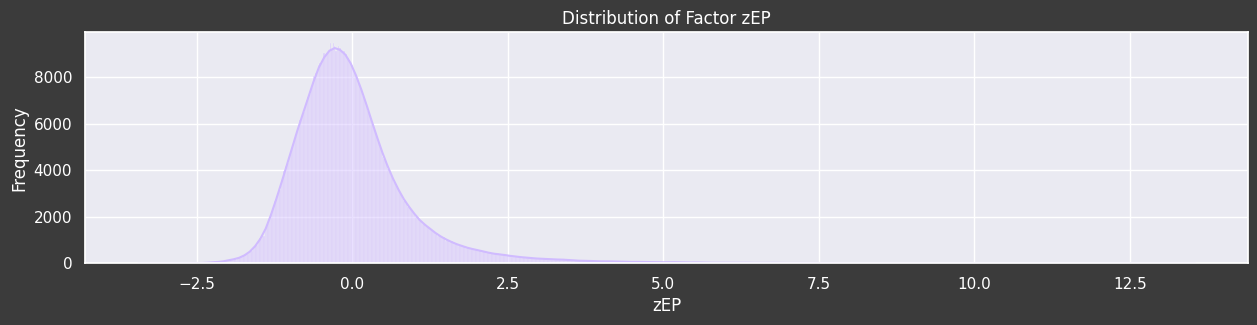

Perc of non-zero data: 50.0%
Perc of missing data: 28.6%
Correlation with returns: -0.3%


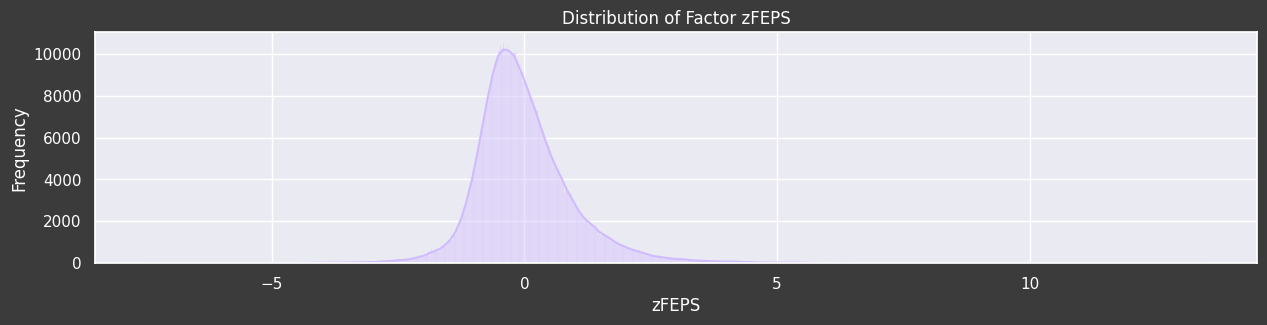

Perc of non-zero data: 27.8%
Perc of missing data: 62.2%
Correlation with returns: -0.1%


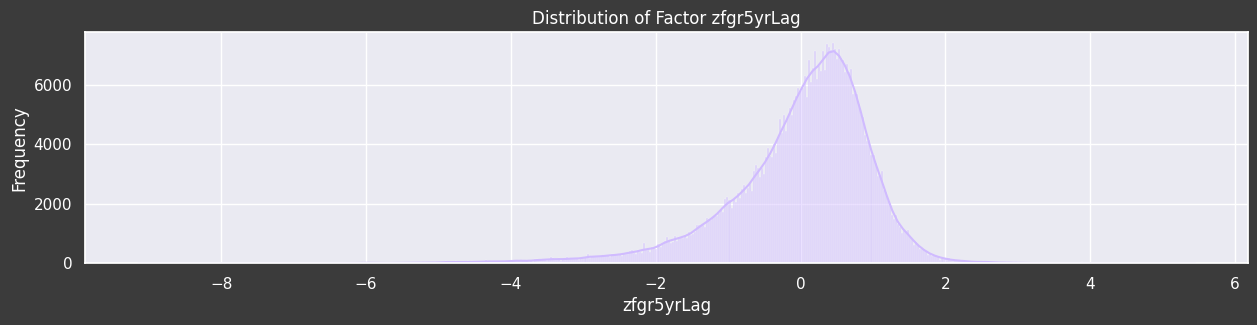

Perc of non-zero data: 50.3%
Perc of missing data: 28.5%
Correlation with returns: 0.9%


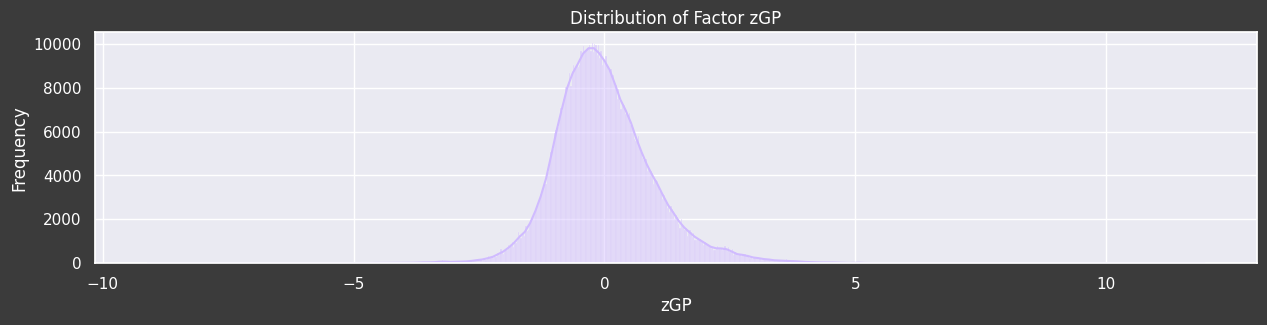

Perc of non-zero data: 47.1%
Perc of missing data: 31.9%
Correlation with returns: 0.6%


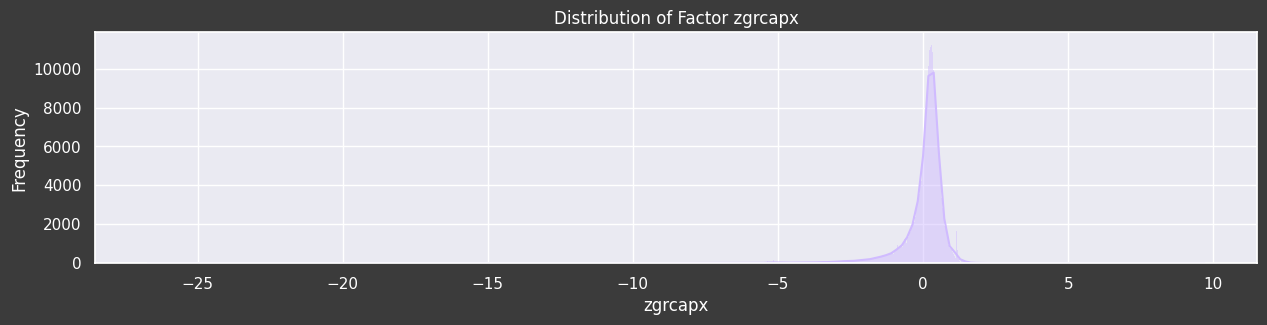

Perc of non-zero data: 56.3%
Perc of missing data: 19.5%
Correlation with returns: 0.5%


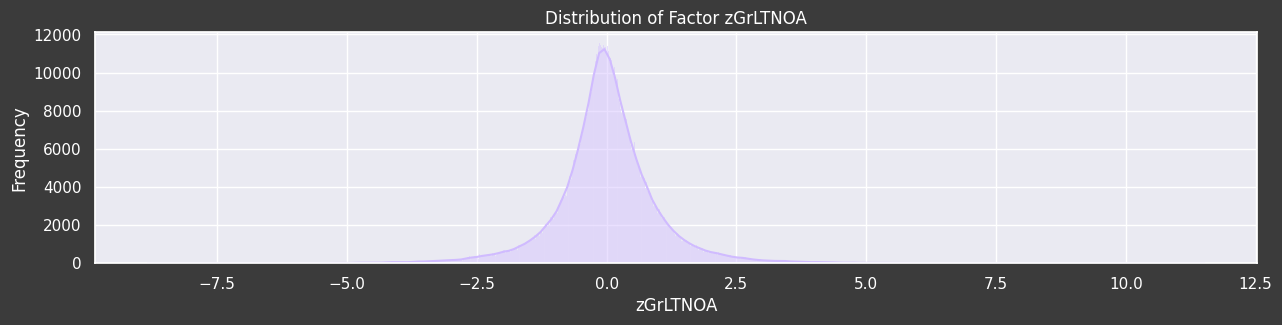

Perc of non-zero data: 71.1%
Perc of missing data: 0.0%
Correlation with returns: 39.6%


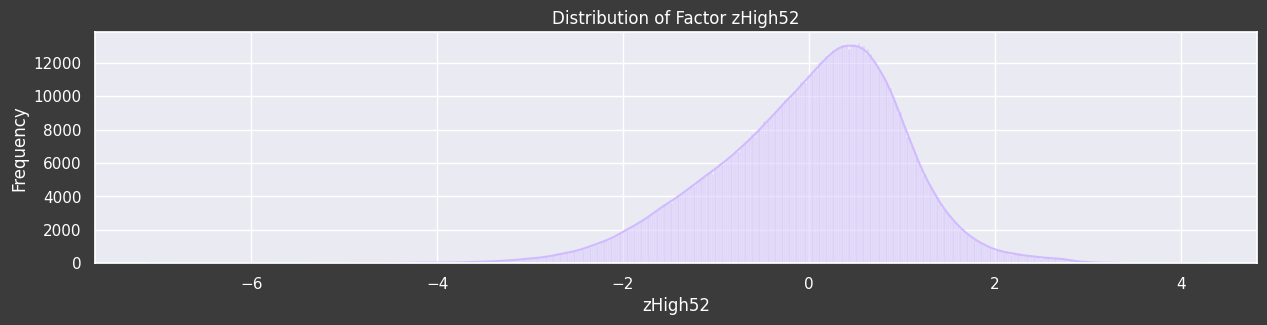

Perc of non-zero data: 62.2%
Perc of missing data: 12.4%
Correlation with returns: 0.9%


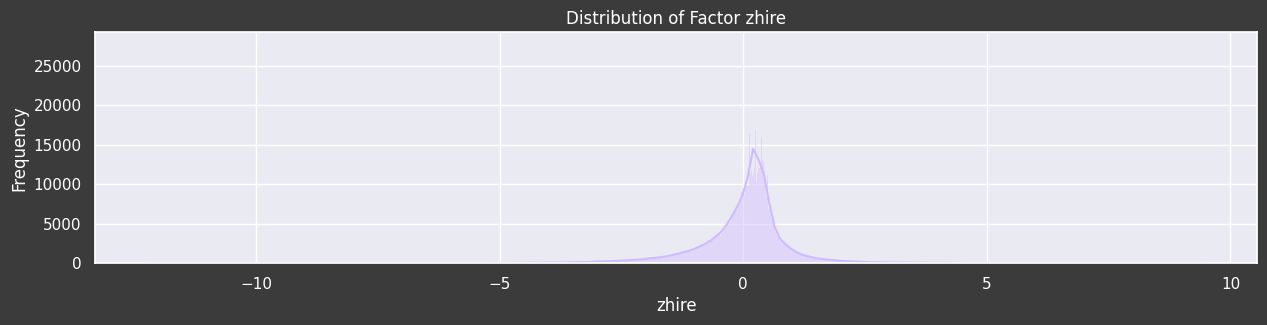

Perc of non-zero data: 71.1%
Perc of missing data: 0.0%
Correlation with returns: -9.1%


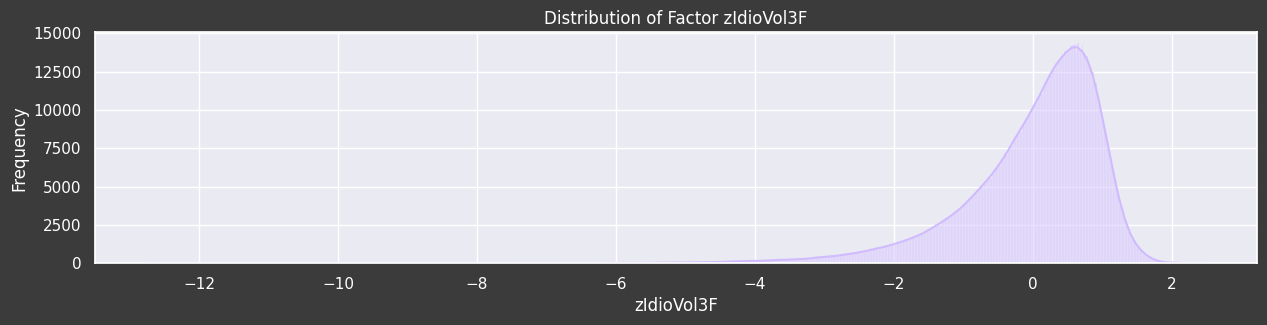

Perc of non-zero data: 60.0%
Perc of missing data: 15.1%
Correlation with returns: 0.6%


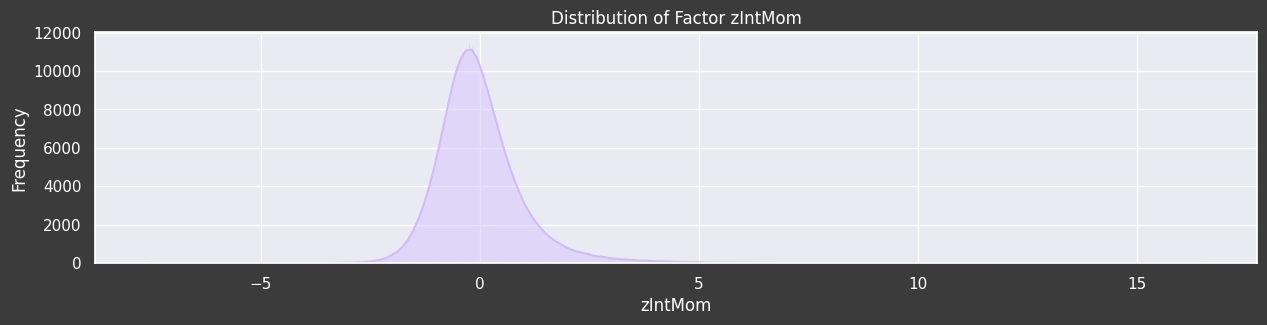

Perc of non-zero data: 45.4%
Perc of missing data: 32.4%
Correlation with returns: 1.2%


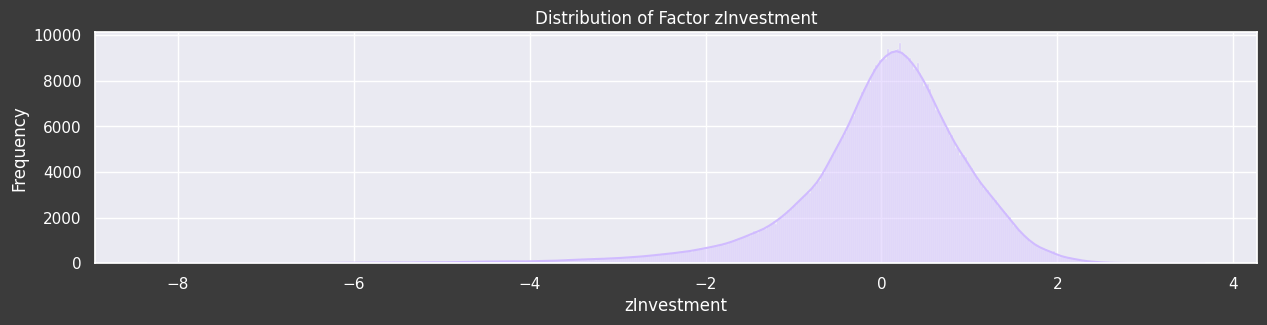

Perc of non-zero data: 63.3%
Perc of missing data: 11.1%
Correlation with returns: -5.2%


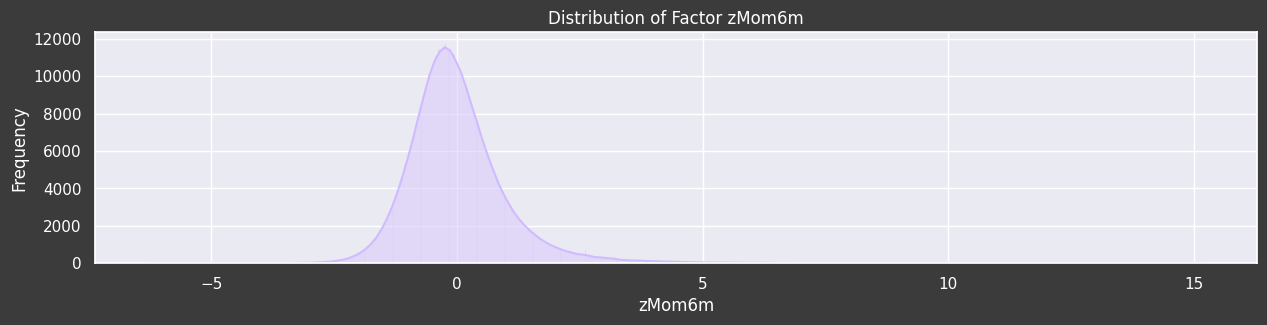

Perc of non-zero data: 55.6%
Perc of missing data: 20.4%
Correlation with returns: 2.3%


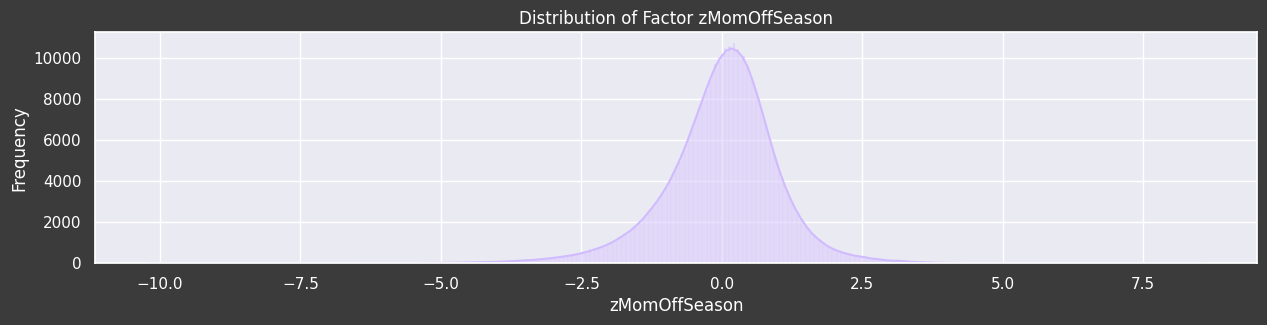

Perc of non-zero data: 55.6%
Perc of missing data: 20.4%
Correlation with returns: 0.2%


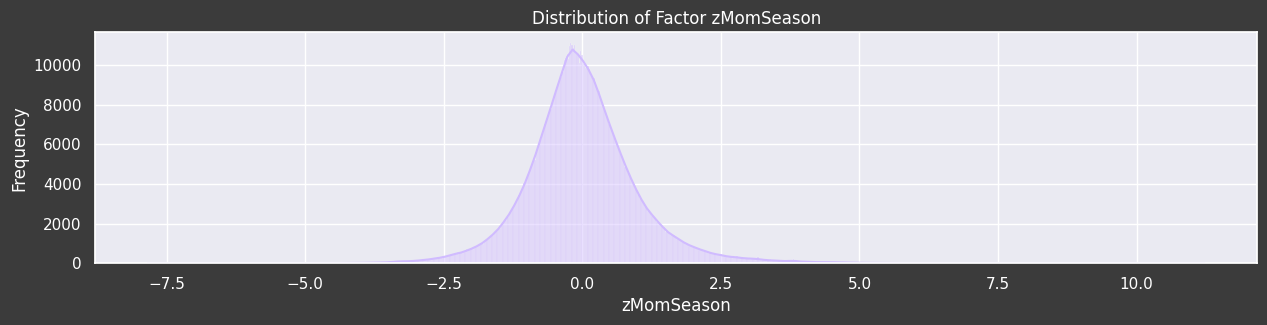

Perc of non-zero data: 24.2%
Perc of missing data: 65.6%
Correlation with returns: 0.6%


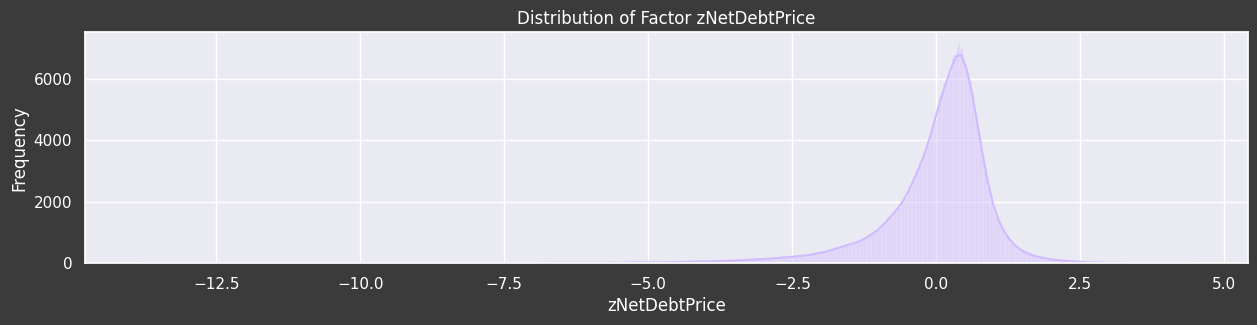

Perc of non-zero data: 38.8%
Perc of missing data: 45.0%
Correlation with returns: -0.7%


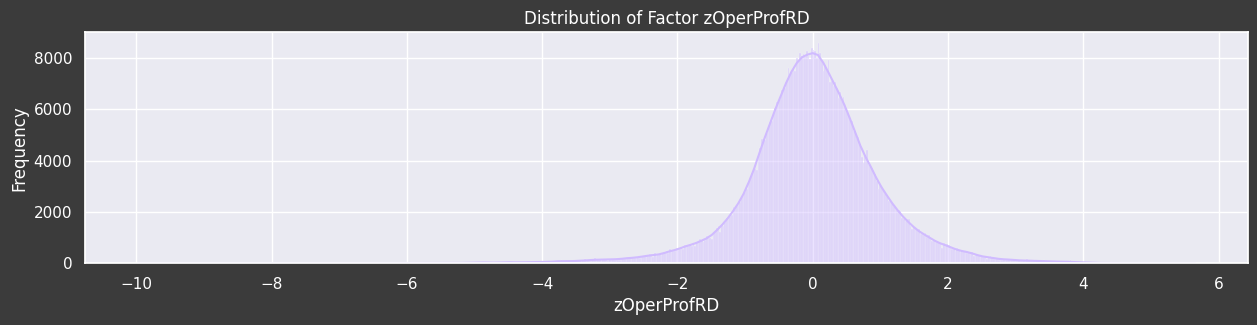

Perc of non-zero data: 20.9%
Perc of missing data: 64.6%
Correlation with returns: -1.4%


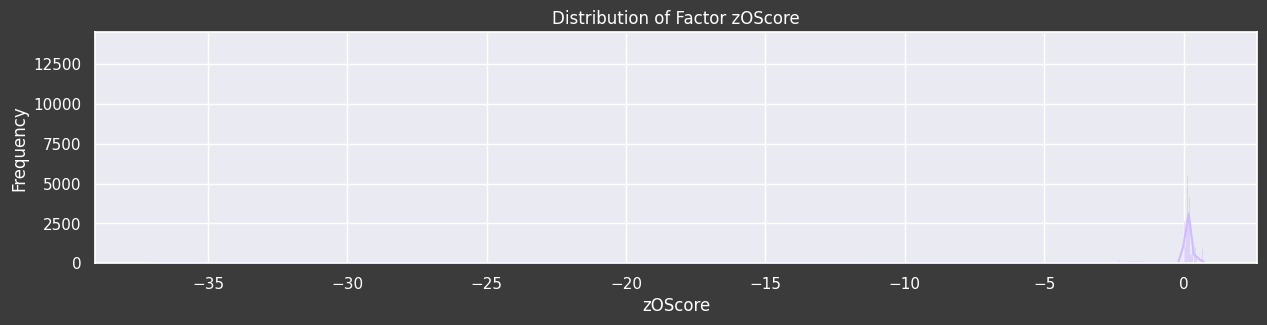

Perc of non-zero data: 27.2%
Perc of missing data: 61.3%
Correlation with returns: -5.3%


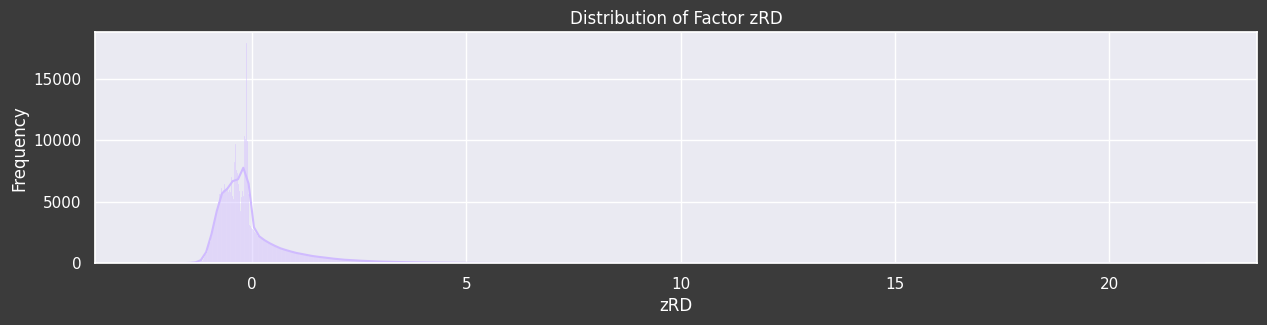

Perc of non-zero data: 71.1%
Perc of missing data: 0.0%
Correlation with returns: -31.6%


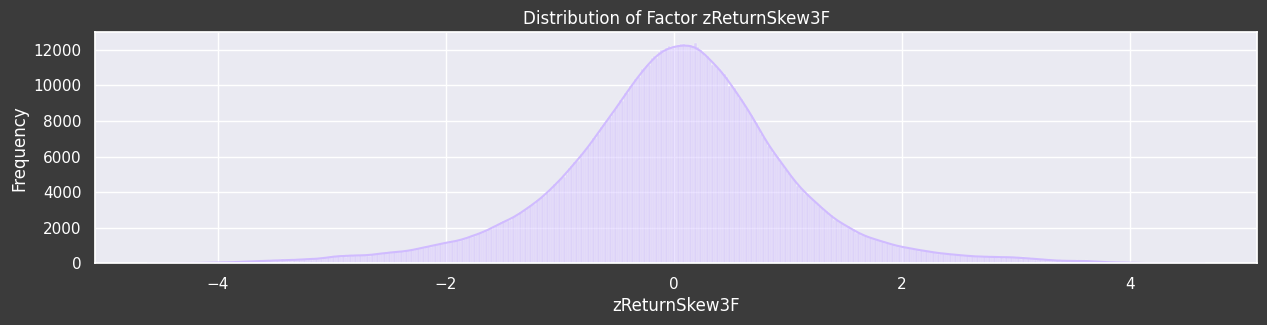

Perc of non-zero data: 45.4%
Perc of missing data: 34.4%
Correlation with returns: 1.8%


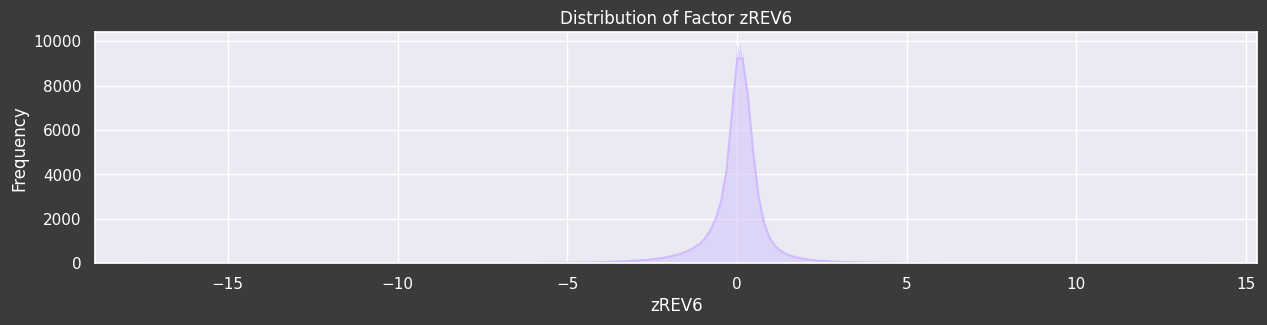

Perc of non-zero data: 24.1%
Perc of missing data: 63.6%
Correlation with returns: -4.0%


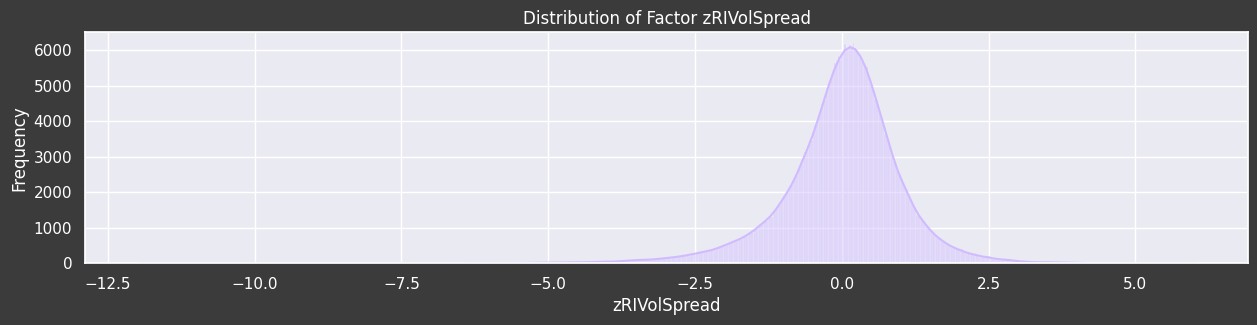

Perc of non-zero data: 57.4%
Perc of missing data: 18.2%
Correlation with returns: 0.2%


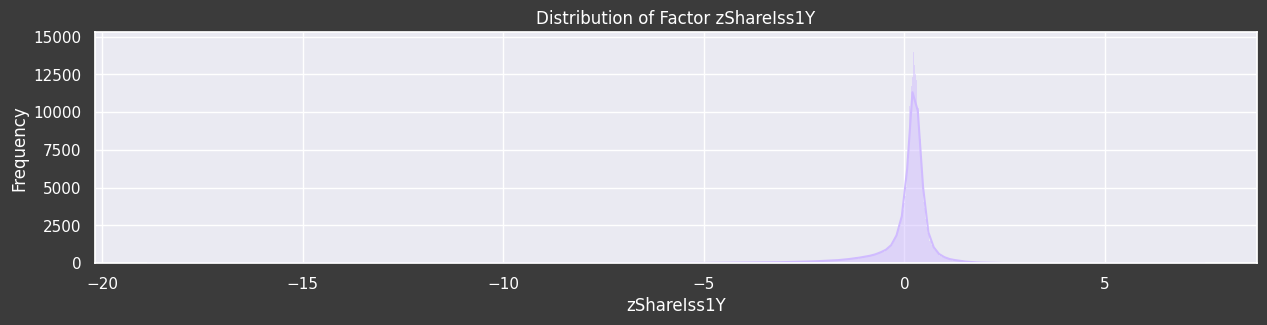

Perc of non-zero data: 25.5%
Perc of missing data: 61.1%
Correlation with returns: -5.1%


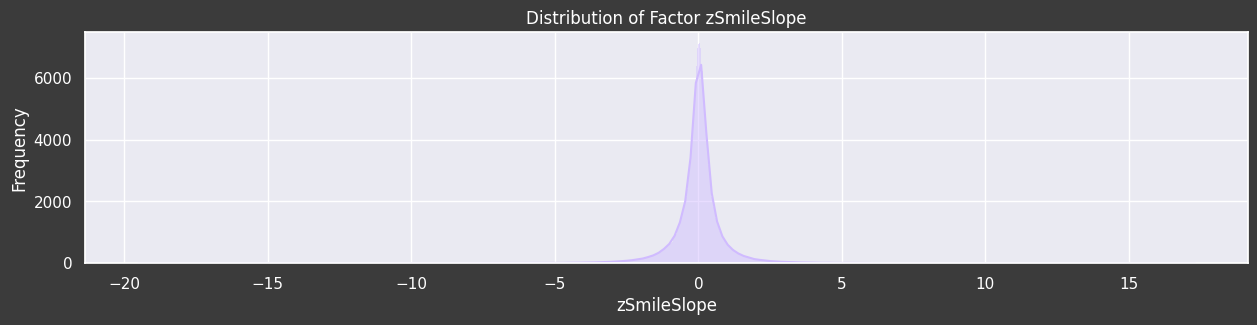

Perc of non-zero data: 26.3%
Perc of missing data: 61.6%
Correlation with returns: 0.2%


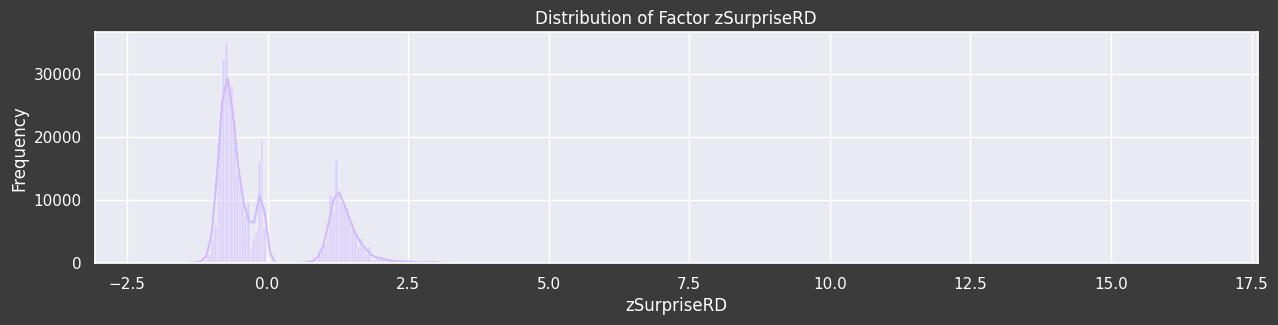

Perc of non-zero data: 54.0%
Perc of missing data: 24.7%
Correlation with returns: 0.2%


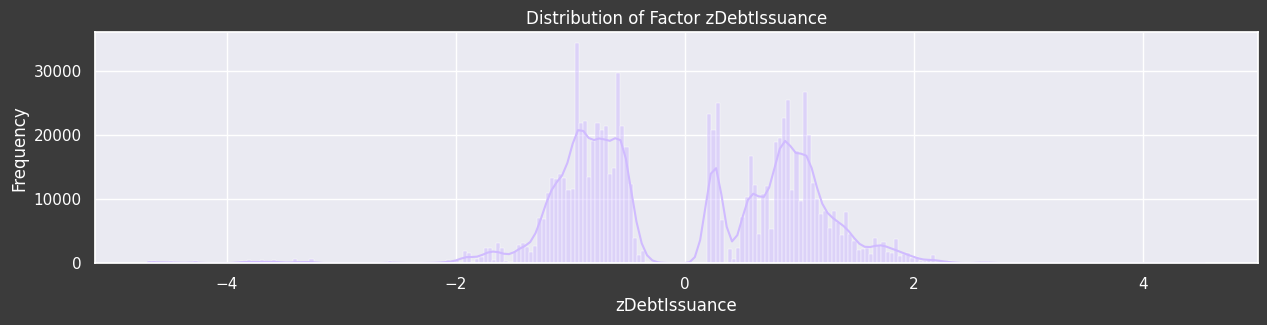

Perc of non-zero data: 71.1%
Perc of missing data: 0.0%
Correlation with returns: 34.1%


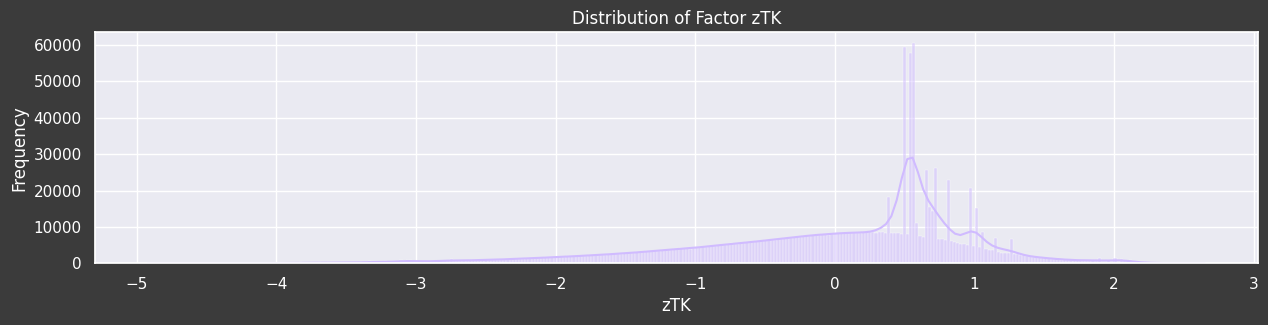

Perc of non-zero data: 71.1%
Perc of missing data: 0.0%
Correlation with returns: 0.0%


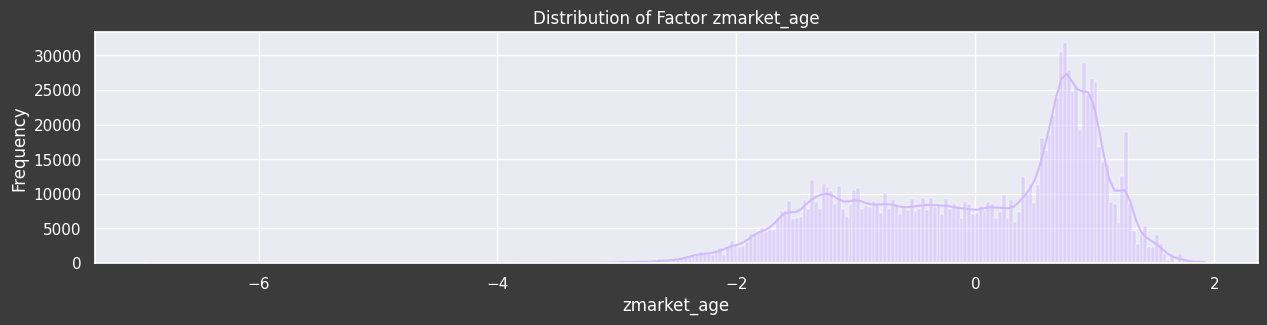

In [23]:
r = data.shape[0]
for col in cols:
    df = data.loc[data[col]!=0,['permno','zret',col]]
    nzero = df[col].count()
    print(f'Perc of non-zero data: {100*nzero/r:0.1f}%')
    print(f'Perc of missing data: {100*df.isna().sum().max()/r:0.1f}%')
    c = df.zret.corr(df[col])
    print(f'Correlation with returns: {100*c:0.1f}%')

    plt.figure(figsize=(15, 3))
    sns.histplot(df[col], kde=True, color=colors[4])  # Use a color from the palette
    plt.title(f'Distribution of Factor {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
#### Distribution of Market Age is interesting
#### Other distributions are similar more or less with only point of interest being extremevalues and skewness
#### Skewed - Realized Vol, MaxRet, IdioVol3F, High52, Beta(positive skew), lnP, TK
#### Extremevals - EP, Realizedvol, MOM6m, MOM12, MaxRet, IdioVol3F, Beta
#### Talking about correlation with Ret -- Realized Vol, IdioVol3F, FirmAge, and TK seem significant

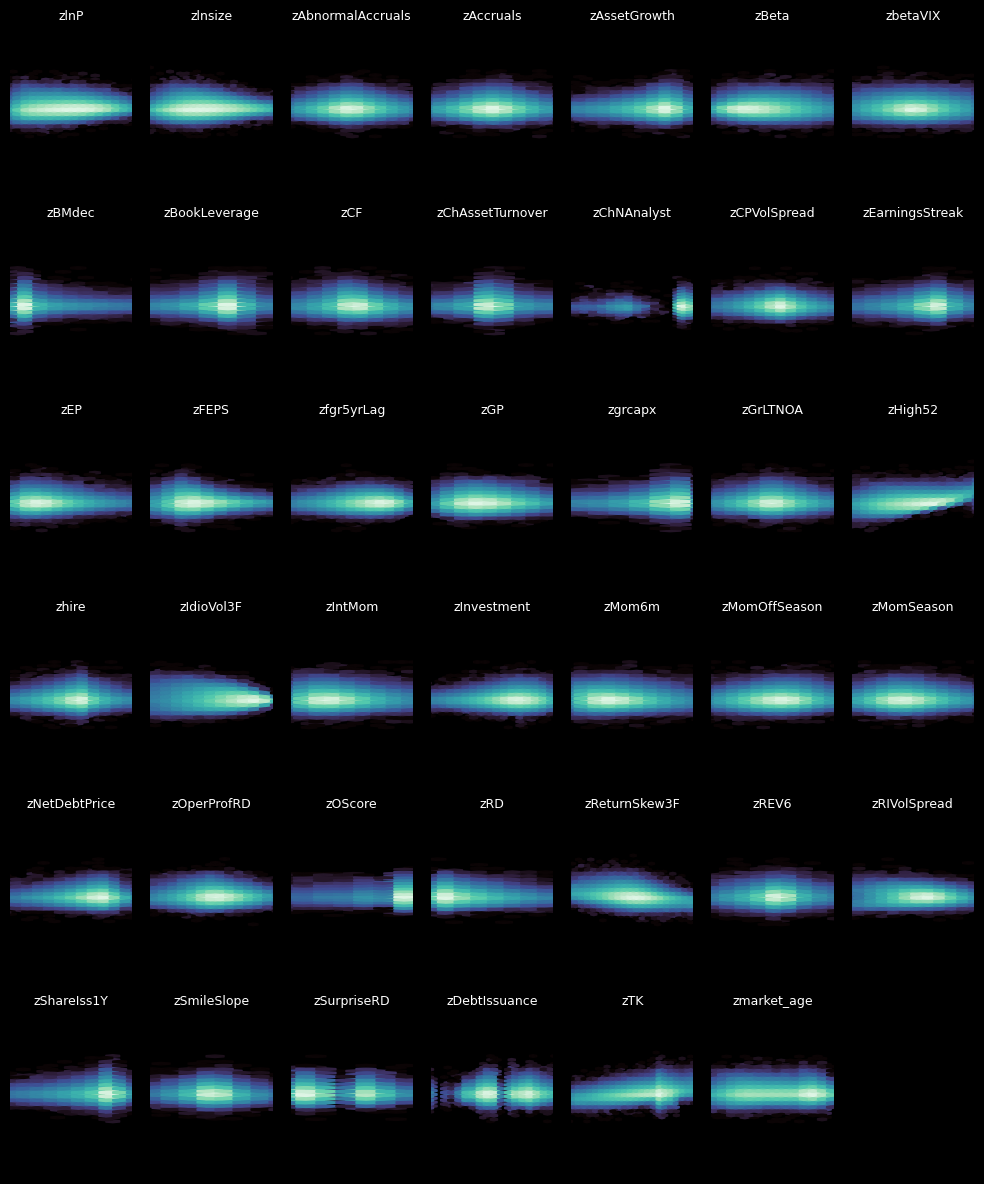

In [58]:
# Determine the grid dimensions for a square-like layout
n_cols = math.ceil(math.sqrt(len(cols)))  # Number of columns
n_rows = math.ceil(len(cols) / n_cols)    # Number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize =(10,12), facecolor='black')
axes = axes.flatten()  # Flatten axes for easier indexing

for i, col in enumerate(cols):
    df = data.loc[data[col] != 0, ['permno', 'zret', col]]

    # Plot hexbin for the current column
    hb = df.plot.hexbin(x=col, y='zret', cmap='mako', ax=axes[i],bins='log',gridsize=30)
    hb.collections[0].colorbar.remove()

    # Set limits for x and y
    xlim = df[col].quantile([0.005, 0.995]).tolist()
    axes[i].set(xlim=xlim, ylim=(-20, 20))

    # Turn off axes labels and ticks
    axes[i].axis('off')

    # Set individual titles
    axes[i].set_title(col, color='white', fontsize=9)

# Hide any unused subplots
for j in range(len(cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [60]:
#### SEEING this hexplot which is basically the improved verson of scatterplot we find that
#### Only TK and Return skew seems to have a visible relation with returns.
#### Also keep in mind these are last-months returns so there is a need of another \\
#### exploration with the future returns (hence the shape of high52 and maxRet)
#### Another thing that pops up is the FirmAge distribution. Worth looking into!